# Learning Curve

In [ ]:
'''
The extent to which ML model to be trained can be understood/better explained using Learning curve.

It can be plotted as 'various data size v/s accuracy' OR 'various data size v/s error'
'''

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = cancer.data
y = cancer.target

In [6]:
X.shape, y.shape

((569, 30), (569,))

# Draw Learning Curve:

In [7]:
from sklearn.model_selection import learning_curve

In [ ]:
'''
learning_curve(
    estimator,
    X,
    y,
    *,
    groups=None,
    train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
    cv=None,
    scoring=None,
    exploit_incremental_learning=False,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    shuffle=False,
    random_state=None,
    error_score=nan,
    return_times=False,
)
'''

In [11]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(),
    X,
    y,
    cv = 10,
    scoring = 'accuracy',
    n_jobs = -1, #use all the cores in my laptop
    train_sizes = np.linspace(0.01,1,50),
    verbose = 1
)

# below we can see total 50 train sets are created. 

[learning_curve] Training set sizes: [  5  15  25  36  46  56  67  77  87  98 108 118 129 139 149 160 170 180
 191 201 212 222 232 243 253 263 274 284 294 305 315 325 336 346 356 367
 377 387 398 408 418 429 439 449 460 470 480 491 501 512]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.2s finished


In [12]:
train_sizes

array([  5,  15,  25,  36,  46,  56,  67,  77,  87,  98, 108, 118, 129,
       139, 149, 160, 170, 180, 191, 201, 212, 222, 232, 243, 253, 263,
       274, 284, 294, 305, 315, 325, 336, 346, 356, 367, 377, 387, 398,
       408, 418, 429, 439, 449, 460, 470, 480, 491, 501, 512])

In [17]:
# Get Train Mean

train_mean = np.mean(train_scores, axis = 1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99972752, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.9997669 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [18]:
# Get Train STD ie how far score is deviating from centered mean

train_std = np.std(train_scores, axis = 1)
train_std

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00081744, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0006993 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
# Get Test Mean

test_mean = np.mean(test_scores, axis = 1)
test_mean

array([0.37258772, 0.37258772, 0.74702381, 0.75761278, 0.70648496,
       0.83302005, 0.85767544, 0.88580827, 0.88756266, 0.92092732,
       0.91917293, 0.91917293, 0.93145363, 0.92973058, 0.94379699,
       0.94201128, 0.94906015, 0.95084586, 0.94558271, 0.94558271,
       0.94909148, 0.94906015, 0.94379699, 0.95256892, 0.95435464,
       0.94733709, 0.95084586, 0.95084586, 0.94909148, 0.95084586,
       0.95260025, 0.95260025, 0.96137218, 0.95786341, 0.95260025,
       0.95961779, 0.96312657, 0.95610902, 0.96137218, 0.95961779,
       0.95961779, 0.96491228, 0.96137218, 0.96137218, 0.96663534,
       0.96488095, 0.97014411, 0.95783208, 0.96488095, 0.96140351])

In [20]:
# Get Test STD

test_std = np.std(test_scores, axis = 1)
test_std

array([0.00696596, 0.00696596, 0.1371453 , 0.13635545, 0.1101728 ,
       0.05045416, 0.04528867, 0.05152023, 0.04777511, 0.03527719,
       0.03609044, 0.03693342, 0.03548845, 0.03504183, 0.03742868,
       0.03141793, 0.03545286, 0.03743713, 0.03630574, 0.02978598,
       0.03876853, 0.03274497, 0.02910136, 0.0323736 , 0.03435334,
       0.03592375, 0.02911224, 0.03212778, 0.03630877, 0.03398984,
       0.03140281, 0.03681686, 0.02575868, 0.02737645, 0.03140281,
       0.02938471, 0.02766206, 0.02958974, 0.03213805, 0.03140981,
       0.03331202, 0.03138341, 0.02804683, 0.03116563, 0.02139211,
       0.02478878, 0.01927853, 0.03345894, 0.02216684, 0.03310169])

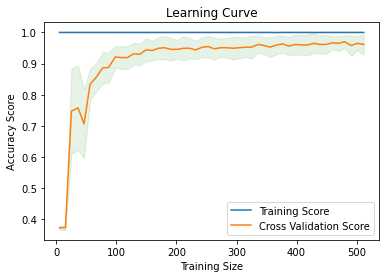

In [29]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross Validation Score')


plt.fill_between(train_sizes, (train_mean - train_std),(train_mean + train_std), alpha=0.1,color="r")    

# train_mean - train_std i.e left side of the centered mean
# train_mean + train_std i.e right side of the centered mean

plt.fill_between(train_sizes, (test_mean - test_std),(test_mean + test_std), alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend (loc = 'best')

# we can see that as the data size is increased the accuracy from testing has increased and at later stage (at around
# 250 data size) it has got saturated. After that even if we increased the the data there is no much progress
# in accuracy so at after some point there is no need to put effort to bring more and more data. If we have to still
# achieve some more better accuracy we need to check for other optinos like Feature Engineering, Feature Scaling,
# hyper parameter tuning etc.
